# Tensorflow

Tensorflow是一个采用数据流图(data flow graph)，用于数值计算的开源软件库。

## 数据流图

数据流图用“节点”(nodes)和“线”(edges)的**有向图**来描述数学计算。
+ “节点”：表示数学操作，或者表示数据输入(feed in)的起点/输出(push out)的终点，或者表示读取/写入持久变量(persistent variable)的终点。
+ “线”：表示“节点”之间的输入/输出关系，运输“size可动态调整”的多维数据数组，即“张量”(tensor)。

## Tensorflow的特征

1. 高度的灵活性；
2. 真正的可移植性(Portability)；
3. 将科研和产品联系在一起；
4. 自动求微分；
5. 多语言支持；
6. 性能最优化；

详见[tensorflow中文社区首页](http://www.tensorfly.cn/)


## 1. 新手入门

### 1.1. 简介

Tensorflow示例代码：Python程序生成一些三维数据，用一个平面去拟合它：


In [1]:
import tensorflow as tf
import numpy as np


# 使用`Numpy`生成假数据(phony data),总共100各点
x_data = np.float32(np.random.rand(2, 100))  # 伪随机生成均匀分布在[0, 1)之间的2x100数组，并转换为float32数据类型，原来是float64
y_data = np.dot([0.100, 0.200], x_data) + 0.300  # y = kTx + k0 真实分布

# 构造一个线性模型
b = tf.Variable(tf.zeros([1]))  # 线性模型的偏置
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))  # 线性模型的参数
y = tf.matmul(W, x_data) + b  # 线性模型y = Wx + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)


# 初始化变量
init = tf.initialize_all_variables()


# 启动图(graph)
sess = tf.Session()
sess.run(init)


# 拟合平面
for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))
        
# 得到最佳拟合效果 W: [[0.100 0.200]], b: [0.300]

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 [[-0.33509916  0.5771301 ]] [0.70164603]
20 [[0.00432041 0.20699319]] [0.34716475]
40 [[0.08016835 0.19218792]] [0.31430474]
60 [[0.09504558 0.19618107]] [0.30448675]
80 [[0.09859212 0.19860245]] [0.30142772]
100 [[0.09957147 0.19952866]] [0.30045706]
120 [[0.09986536 0.1998456 ]] [0.3001467]
140 [[0.09995712 0.19995   ]] [0.30004713]
160 [[0.09998628 0.19998388]] [0.30001515]
180 [[0.0999956  0.19999483]] [0.30000484]
200 [[0.09999859 0.19999835]] [0.30000156]


### 1.2. 训练你的第一个神经网络：basic classfication

本教程训练了一个用于分类衣服图像的模型，例如鞋子和衬衫。本教程使用Tensorflow中用于构建和训练模型的高级API:[tf.keras](https://www.tensorflow.org/guide/keras?hl=zh-cn)

In [3]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# verify ssl
import ssl

ssl._create_default_https_context = ssl._create_unverified_context  # 验证ssl证书，不然下载MNIST数据集时会报错

print(tf.__version__)

1.12.0


**导入[Fashion MNIST]()数据集**

---

本教程使用[Fashion MNIST]()数据集，其中包含了10个类别的70000张灰度图像。这些图像以28x28的低解析度展示每一个物件，正如下所示

![](https://tensorflow.org/images/fashion-mnist-sprite.png?hl=zh-cn)

[Fashion MNIST]: https://github.com/zalandoresearch/fashion-mnist

Fashion MNIST旨在直接替换经典[MINIST](http://yann.lecun.com/exdb/mnist/)数据集--经常被用作计算机视觉领域的机器学习程序的“Hello world”示例。MINIST数据集包含28x28的手写数字（0，1，2等等）图片。

出于多样性及更具挑战性的考虑，本教程使用了比经典MNIST数据集更具挑战性的Fashion MNIST数据集。两个数据集都相当的小，并经常用于验证一个算法是否达到预期效果，适用于开始学习、测试和debug代码。

我们使用60000张图片作为训练集，10000图片作为测试集。我们可以直接从Tensorflow中获取Fashion MINIST数据集，只需导入并加载数据：


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

加载数据集返回4个Numpy arrays：

+ 训练数据集：`train_image`和`train_labels`;
+ 测试数据集：`test_image`和`test_labels`;

`images`是28x28的numpy arrays，像素值范围为0~255。`labels`是整型数数组，取值范围为0～9.每张图片对应一个label，除此之外,我们还需要在代码上补充一下每个类别的名称,组成一个list,代码如下:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


**探索数据**

---

让我们来探索下训练数据集的格式。如下展示训练数据集包含60000张图片，每张图片表示为28x28的像素点：

In [6]:
print('train_images:', train_images, sep='\n')
print('*****' * 15)
print('train_labels', train_labels)
print('*****' * 15)
print('test_images:', test_images, sep='\n')
print('*****' * 15)
print('test_labels', test_labels)
print('*****' * 15)

print('train_images.shape:', train_images.shape)

# 相似地，在训练数据集中有60000个标签
print('train_labels.shape:', train_labels.shape)

print('test_images.shape:', test_images.shape)

# 相似地，在训练数据集中有60000个标签
print('test_labels.shape:', test_labels.shape)

train_images:
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
***************************************************************************
train_labels [9 0 0 ... 3 0 5]
***************************************************************************
test_images:
[[[0 0 0 ... 0 0

**数据预处理**

---

训练数据之前必须对数据进行预处理。如果你观察训练数据的第一张图片，你会发现像素点取值范围为0～255:

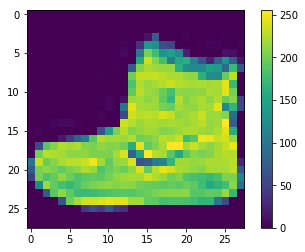

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

对像素点进行max-min归一化：

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

展示并验证前25张图片及其标签是否匹配

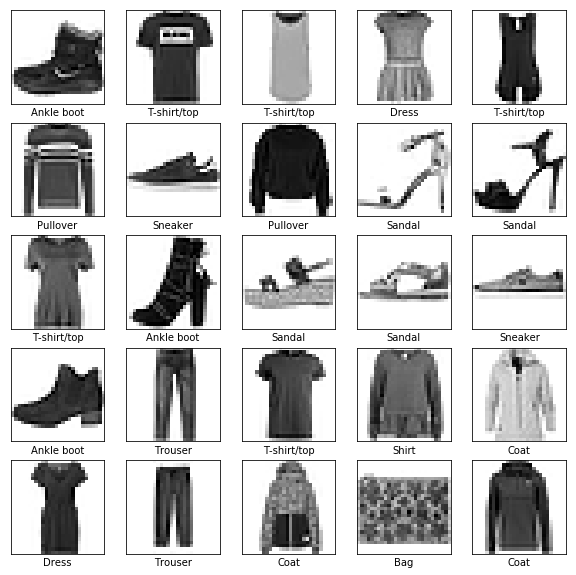

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


**构建模型**

---

构建神经网络需要配置模型的层layers，并编辑compiling模型。

**配置layers**

神经网络的基础构建模块是层layer。层layers从输入数据中抽取representations。并且，这些representations对当前问题更有意义。

大多数神经网络由串接的简单层组成。大多数层layers，例如，`tf.keras.layers.Dense`包含需要去学习的参数。

In [10]:
model = keras.Sequential([  # 使用的是序贯模型：单输入单输出，层间只有相邻关系，没有跨层连接
    keras.layers.Flatten(input_shape=(28, 28)),  # 输入层，将28x28的2维数组转换成784的1维数组
    keras.layers.Dense(128, activation=tf.nn.relu),  # 全连接层，输出为128维空间，即128个神经元，激活函数是relu
    keras.layers.Dense(10, activation=tf.nn.softmax)  # 输出softmax层，输出维10维空间，即10个神经元，softmax变换后
                                                      # 输出为10个概率值，且求和为1
])


代码部分注释：

1. keras.layers.Flatten():
```
tensorflow.keras.layers.Flatten = class Flatten(tensorflow.python.keras.engine.base_layer.Layer)
 |  Flattens the input. Does not affect the batch size.
 |
 |  Arguments:
 |      data_format: A string,
 |          one of `channels_last` (default) or `channels_first`.
 |          The ordering of the dimensions in the inputs.
 |          `channels_last` corresponds to inputs with shape
 |          `(batch, ..., channels)` while `channels_first` corresponds to
 |          inputs with shape `(batch, channels, ...)`.
 |          It defaults to the `image_data_format` value found in your
 |          Keras config file at `~/.keras/keras.json`.
 |          If you never set it, then it will be "channels_last".
 |
 |  Example:
 |
 |     python
 |      model = Sequential()
 |      model.add(Convolution2D(64, 3, 3,
 |                              border_mode='same',
 |                              input_shape=(3, 32, 32)))
 |      # now: model.output_shape == (None, 64, 32, 32)
 |      model.add(Flatten())
 |      # now: model.output_shape == (None, 65536)
```
 
2. keras.layers.Dense():
 ```
 tensorflow.keras.layers.Dense = class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |
 |  Note: if the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |
 |  Example:
 |
 |     python
 |      # as first layer in a sequential model:
 |      model = Sequential()
 |      model.add(Dense(32, input_shape=(16,)))
 |      # now the model will take as input arrays of shape (*, 16)
 |      # and output arrays of shape (*, 32)
 |
 |      # after the first layer, you don't need to specify
 |      # the size of the input anymore:
 |      model.add(Dense(32))
 |  
 |
 |  Arguments:
 |      units: Positive integer, dimensionality of the output space.
 |      activation: Activation function to use.
 |          If you don't specify anything, no activation is applied
 |          (ie. "linear" activation: `a(x) = x`).
 |      use_bias: Boolean, whether the layer uses a bias vector.
 |      kernel_initializer: Initializer for the `kernel` weights matrix.
 |      bias_initializer: Initializer for the bias vector.
 |      kernel_regularizer: Regularizer function applied to
 |          the `kernel` weights matrix.
 |      bias_regularizer: Regularizer function applied to the bias vector.
 |      activity_regularizer: Regularizer function applied to
 |          the output of the layer (its "activation")..
 |      kernel_constraint: Constraint function applied to
 |          the `kernel` weights matrix.
 |      bias_constraint: Constraint function applied to the bias vector.
 |
 |  Input shape:
 |      nD tensor with shape: `(batch_size, ..., input_dim)`.
 |      The most common situation would be
 |      a 2D input with shape `(batch_size, input_dim)`.
 |
 |  Output shape:
 |      nD tensor with shape: `(batch_size, ..., units)`.
 |      For instance, for a 2D input with shape `(batch_size, input_dim)`,
 |      the output would have shape `(batch_size, units)`.
```

3. tensorflow.nn.relu():
```
tensorflow.nn.relu = relu(features, name=None)
    Computes rectified linear: `max(features, 0)`.

    Args:
      features: A `Tensor`. Must be one of the following types: `float32`, `float64`, `int32`, `uint8`, `int16`, `int8`, `int64`, `bfloat16`, `uint16`, `half`, `uint32`, `uint64`, `qint8`.
      name: A name for the operation (optional).

    Returns:
      A `Tensor`. Has the same type as `features`.
```

4. tensorflow.nn.softmax():
```
tensorflow.nn.softmax = softmax(logits, axis=None, name=None, dim=None)
    Computes softmax activations. (deprecated arguments)

    SOME ARGUMENTS ARE DEPRECATED. They will be removed in a future version.
    Instructions for updating:
    dim is deprecated, use axis instead

    This function performs the equivalent of

        softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)

    Args:
      logits: A non-empty `Tensor`. Must be one of the following types: `half`,
        `float32`, `float64`.
      axis: The dimension softmax would be performed on. The default is -1 which
        indicates the last dimension.
      name: A name for the operation (optional).
      dim: Deprecated alias for `axis`.

    Returns:
      A `Tensor`. Has the same type and shape as `logits`.

    Raises:
      InvalidArgumentError: if `logits` is empty or `axis` is beyond the last
        dimension of `logits`.
```

**编译模型**

在模型能够进行训练之前，仍需要对模型进行一些配置。这些配置在模型的编译步骤时加上：
+ 损失函数--损失的度量方式，这里使用的是'sparse_categorical_crossentropy'；
+ 优化器--采用何种方式寻找最佳答案，这里使用的是AdamOptimizer；
+ 度量准则--这里使用的是准确率，也就是正确归类的图像的概率；

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


**训练模型**

---

训练神经网络需要如下步骤：
1. 将数据输入到模型中--在这个例子中，即`train_images`和`train_labels`arrays；
2. 训练模型学习images和labels之间的关联关系；
3. 模型在测试数据集上预测--在这个例子中，即`test_images`array，并使用`test_labels`来验证模型的预测是否准确；

调用`model.fit`方法来开始训练模型--模型不断拟合fit训练数据：

In [12]:
model.fit(train_images, train_labels, epochs=5)  # 进行5轮迭代epochs，模型拟合训练集

Epoch 1/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.4966 - acc: 0.8260: 
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3784 - acc: 0.8628
Epoch 3/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3406 - acc: 0.8773
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3171 - acc: 0.8830
Epoch 5/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2995 - acc: 0.8899


在模型训练过程中，损失和准确率准则都实时显示。

**评估准确率**

---

现在测试模型在测试集上的表现：

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test Accuracy:", test_acc)

10000/10000 [==============================] - 0s 46us/step
Test Accuracy: 0.8777


it turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

**使用模型进行预测**

---

使用训练好的模型，我们可以对一些图片进行预测：

In [14]:
predictions = model.predict(test_images)

print(predictions[0], type(predictions), sep='\n')

[2.9509278e-07 6.7126685e-08 1.6497935e-07 4.4343754e-08 2.0668867e-07
 4.1287108e-03 1.5130826e-07 2.3240946e-02 9.5522628e-06 9.7261983e-01]
<class 'numpy.ndarray'>


model.predict()返回的是一个array,我们每一个元素是对一个图像的预测结果,这个预测结果是一个一维的包含10个概率的数组,概率最大的元素的下标就是结果.

In [15]:
print('predicts label:', np.argmax(predictions[0]))  # argmax返回最大元素的索引
print('true label:', test_labels[0])


predicts label: 9
true label: 9


我们可以画图来观察这组10元素的输出：

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)  # argmax返回最大元素的索引
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),  # max返回最大元素值
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



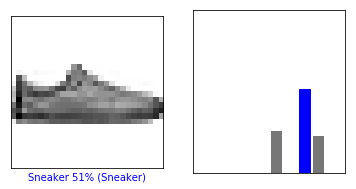

In [17]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

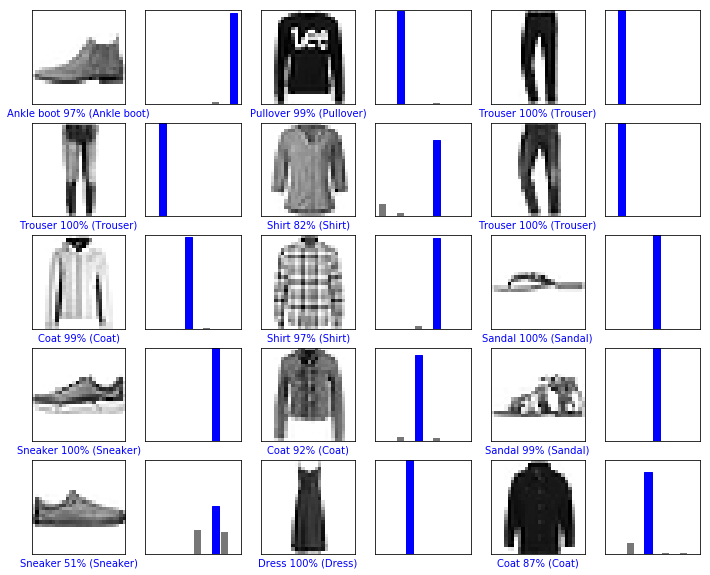

In [18]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


最后，我们使用训练好的模型来对一张图片进行预测

In [19]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras`模型被优化以能够一次性对一批batch，或者一集合collections的样本点进行预测。所以即使我们仅对一张图片进行预测，我们也要将其转换成列表：

In [20]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


1. numpy.expand_dims():
```
numpy.expand_dims = expand_dims(a, axis)
    Expand the shape of an array.

    Insert a new axis that will appear at the `axis` position in the expanded
    array shape.

    .. note:: Previous to NumPy 1.13.0, neither ``axis < -a.ndim - 1`` nor
       ``axis > a.ndim`` raised errors or put the new axis where documented.
       Those axis values are now deprecated and will raise an AxisError in the
       future.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int
        Position in the expanded axes where the new axis is placed.

    Returns
    -------
    res : ndarray
        Output array. The number of dimensions is one greater than that of
        the input array.
```

接着，我们预测图片：

[[2.9509363e-07 6.7126564e-08 1.6497935e-07 4.4343754e-08 2.0668867e-07
  4.1287132e-03 1.5130840e-07 2.3240957e-02 9.5522710e-06 9.7261983e-01]]


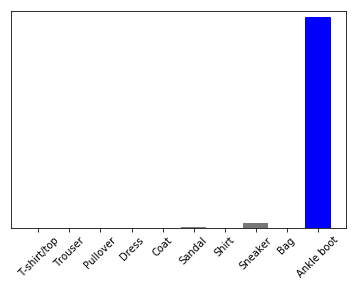

In [21]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)

_ = plt.xticks(range(10), class_names, rotation=45)



In [22]:
# 查看模型概况
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
print(type(model.input))
print(model.output)

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("dense_1/Softmax:0", shape=(?, 10), dtype=float32)


测试将tensorflow keras模型以tensorflow SavedModel格式保存并导出

In [40]:
import os
model_version = 1
export_path_base = './basic_classification'
export_path = os.path.abspath(os.path.join(
        tf.compat.as_bytes(export_path_base),
        tf.compat.as_bytes(str(model_version))
    ))
print(export_path)

# 创建SavedModelBuilder
builder = tf.saved_model.builder.SavedModelBuilder(export_path)

tensor_info_x = tf.saved_model.utils.build_tensor_info(model.input)
tensor_info_y = tf.saved_model.utils.build_tensor_info(model.output)

predict_signature = (tf.saved_model.signature_def_utils.build_signature_def(
                            inputs={'image':tensor_info_x},
                            outputs={'soft_scores': tensor_info_y},
                            method_name=tf.saved_model.signature_constants.PREDICT_METHOD_NAME
                        ))

builder.add_meta_graph_and_variables(
    tf.keras.backend.get_session(),
    [tf.saved_model.tag_constants.SERVING],
    signature_def_map = {
       "predict_dist": predict_signature
    },
    strip_default_attrs = True
)

builder.save()



b'/Users/mac/github-local-repos/ClassNotes/NeuralNetwork/tensorflow_learnings/basic_classification/1'
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /Users/mac/github-local-repos/ClassNotes/NeuralNetwork/tensorflow_learnings/basic_classification/1/saved_model.pb


b'/Users/mac/github-local-repos/ClassNotes/NeuralNetwork/tensorflow_learnings/basic_classification/1/saved_model.pb'

测试使用tensorflow serving发布的basic classification模型效果

In [52]:
import requests
req_json = {"signature_name": "predict_dist", "instances": [ img.tolist() ]}
r = requests.post('http://localhost:8501/v1/models/basic_classification:predict', json=req_json)
r.text

'{\n    "predictions": [[2.95094e-07, 6.71266e-08, 1.64979e-07, 4.43438e-08, 2.06689e-07, 0.00412871, 1.51308e-07, 0.023241, 9.55227e-06, 0.97262]\n    ]\n}'